# Simple Linear Regression

# Upgrading scikit-learn

In [1]:
%pip install scikit-learn --upgrade --user


                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 6.3 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 11.4 MB/s eta 0:00:01
     ------                                   1.5/9.2 MB 13.4 MB/s eta 0:00:01
     --------                                 1.9/9.2 MB 12.2 MB/s eta 0:00:01
     ----------                               2.4/9.2 MB 10.8 MB/s eta 0:00:01
     -----------                              2.6/9.2 MB 9.7 MB/s eta 0:00:01
     -------------                            3.0/9.2 MB 9.6 MB/s eta 0:00:01
     --------------                           3.3/9.2 MB 8.8 MB/s eta 0:00:01
     ---------------                          3.6/9.2 MB 8.8 MB/s eta 0:00:01
     ----------------                         3.7/9.2 MB 7.9 MB/s eta 0:00:01
     ----------------                         3.9/9.2 MB 7.5 MB/s eta 0:00:01
     -----------------                        4.0/9.2 MB 7.3 MB/s 

# Restart and run all the cells

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the dataset

In [5]:
import os
os.chdir('D:/Dipti/DA_DS/Python/Dataframe/')

In [6]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

# PROFIT ~ RND

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

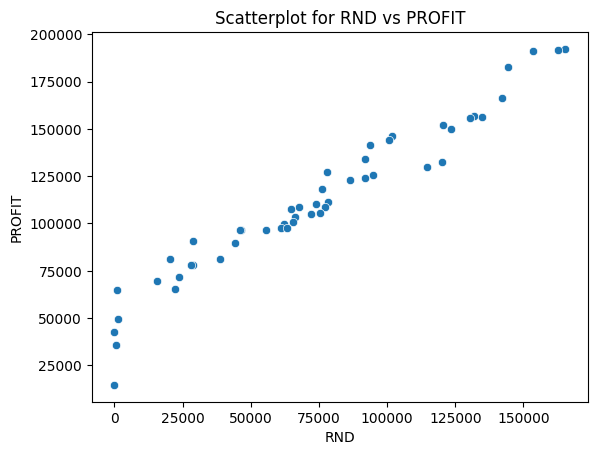

In [11]:
sns.scatterplot(data=df, x='RND', y='PROFIT')
plt.title('Scatterplot for RND vs PROFIT')
plt.show()

# Seperate X and Y features

 X - RND         
 Y - PROFIT

In [12]:
X =df[['RND']]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
Y = df[['PROFIT']]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Create Linear Regration Model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

# Coefficient and intercept

In [16]:
model.intercept_

array([49032.89914125])

In [17]:
model.coef_

array([[0.85429137]])

# PROFIT_pred = 49032.89 + 0.8543*RND

Checking model R2 Score

In [18]:
model.score(X,Y)

0.9465353160804392

# Perform other evaluations on model

In [20]:
ypred = model.predict(X)

In [21]:
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [22]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mse = mean_squared_error(Y, ypred)


In [25]:
mse

85120931.32706907

In [26]:
16**(1/2)

4.0

In [27]:
9**(1/2)

3.0

In [28]:
rmse = mse**(1/2)

In [29]:
rmse

9226.100548285232

In [30]:
mae = mean_absolute_error(Y, ypred)

In [31]:
mae

6910.984354579614

In [32]:
r2 = r2_score(Y, ypred)

In [33]:
r2

0.9465353160804392

# Checking how line is fitted

<Axes: xlabel='RND', ylabel='PROFIT'>

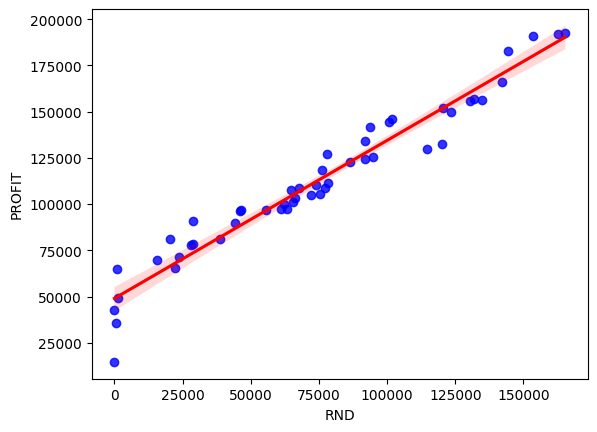

In [34]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'}, scatter_kws={'color':'blue'})

# PROFIT and RND have a strong Linear Relationship because R2 score is 0.9465

# Predict the new values

In [35]:
RND = [[100000]]
profit_pred = model.predict(RND)
profit_pred

array([[134462.03623513]])